In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_train = pd.read_csv('train.csv', delimiter='\t')
df_test = pd.read_csv('test.csv', delimiter='\t')

In [3]:
df_train.head()

,id,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,0,0,715,0,0,423,206,150,1,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505
1,2,0,2151,0,0,1457,1321,1704,1,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073
2,3,0,439,0,0,691,213,5,0,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228
3,7,0,28,1,0,285,31,0,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412
4,12,0,40,0,0,907,60,1013,1,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619


In [4]:
df_test.head()

,id,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,1,1990,0,0,546,1225,133,0,53,21007,0.869048,2208.218750,90.363636,2.5,0.121212
1,4,601,0,0,948,368,212,0,32,26934,0.612211,292.957143,65.829787,2.0,0.609929
2,5,17,0,0,301,39,1,0,5,25497,0.879310,116383.545455,98.666667,1.0,0.083333
3,6,271,0,0,126,62,3,0,2,70240,0.741379,24589.039682,75.204724,3.0,0.157480
4,8,8,1,0,960,146,24,0,0,12162,0.500000,32.428571,35.750000,1.0,0.250000


In [5]:
print(df_train.shape)
print(df_test.shape)
print(df_train.info())
print(df_test.info())

(1588, 16)
(1588, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588 entries, 0 to 1587
Data columns (total 16 columns):
id                          1588 non-null int64
bot                         1588 non-null int64
statuses_count              1588 non-null int64
default_profile             1588 non-null int64
default_profile_image       1588 non-null int64
friends_count               1588 non-null int64
followers_count             1588 non-null int64
favourites_count            1588 non-null int64
geo_enabled                 1588 non-null int64
listed_count                1588 non-null int64
account_age_hours           1588 non-null int64
diversity                   1588 non-null float64
mean_mins_between_tweets    1588 non-null float64
mean_tweet_length           1588 non-null float64
mean_retweets               1588 non-null float64
reply_rate                  1588 non-null float64
dtypes: float64(5), int64(11)
memory usage: 198.6 KB
None
<class 'pandas.core.frame.DataFrame

In [6]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

id                          0
bot                         0
statuses_count              0
default_profile             0
default_profile_image       0
friends_count               0
followers_count             0
favourites_count            0
geo_enabled                 0
listed_count                0
account_age_hours           0
diversity                   0
mean_mins_between_tweets    0
mean_tweet_length           0
mean_retweets               0
reply_rate                  0
dtype: int64
id                          0
statuses_count              0
default_profile             0
default_profile_image       0
friends_count               0
followers_count             0
favourites_count            0
geo_enabled                 0
listed_count                0
account_age_hours           0
diversity                   0
mean_mins_between_tweets    0
mean_tweet_length           0
mean_retweets               0
reply_rate                  0
dtype: int64


In [13]:
# bot以外の0/1データのカラムを削除
df_train1 = df_train.drop(['default_profile', 'default_profile_image', 'geo_enabled'], axis=1)

In [14]:
df_train1.head()

,id,bot,statuses_count,friends_count,followers_count,favourites_count,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,0,0,715,423,206,150,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505
1,2,0,2151,1457,1321,1704,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073
2,3,0,439,691,213,5,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228
3,7,0,28,285,31,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412
4,12,0,40,907,60,1013,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619


In [15]:
df_train1.corr()
#  'statuses_count','mean_mins_between_tweets'の相関係数が大きい

,id,bot,statuses_count,friends_count,followers_count,favourites_count,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
id,1.000000,0.021782,0.015923,0.005114,0.009893,0.031527,0.019699,0.007482,-0.036990,-0.012682,0.000057,-0.015360,-0.026738
bot,0.021782,1.000000,-0.127216,-0.024027,-0.033112,-0.078671,-0.075608,-0.229746,0.112604,0.253207,-0.129651,-0.024273,-0.082452
statuses_count,0.015923,-0.127216,1.000000,0.295279,0.237502,0.309038,0.303930,0.189305,-0.071162,-0.089360,-0.017772,0.008460,0.138921
friends_count,0.005114,-0.024027,0.295279,1.000000,0.922871,0.123385,0.348717,0.031618,-0.074305,-0.015428,0.028831,0.013843,-0.010471
followers_count,0.009893,-0.033112,0.237502,0.922871,1.000000,0.098982,0.405729,0.035094,-0.062057,-0.020385,0.033969,0.042584,-0.002805
favourites_count,0.031527,-0.078671,0.309038,0.123385,0.098982,1.000000,0.200756,0.111353,0.003540,-0.053377,-0.036438,0.006687,0.105890
listed_count,0.019699,-0.075608,0.303930,0.348717,0.405729,0.200756,1.000000,0.159773,-0.037145,-0.051144,0.030659,0.048199,0.065247
account_age_hours,0.007482,-0.229746,0.189305,0.031618,0.035094,0.111353,0.159773,1.000000,-0.028014,-0.021879,-0.085188,-0.024870,0.154075
diversity,-0.036990,0.112604,-0.071162,-0.074305,-0.062057,0.003540,-0.037145,-0.028014,1.000000,0.254457,-0.010969,0.010084,0.034501
mean_mins_between_tweets,-0.012682,0.253207,-0.089360,-0.015428,-0.020385,-0.053377,-0.051144,-0.021879,0.254457,1.000000,-0.155605,-0.015479,-0.073744


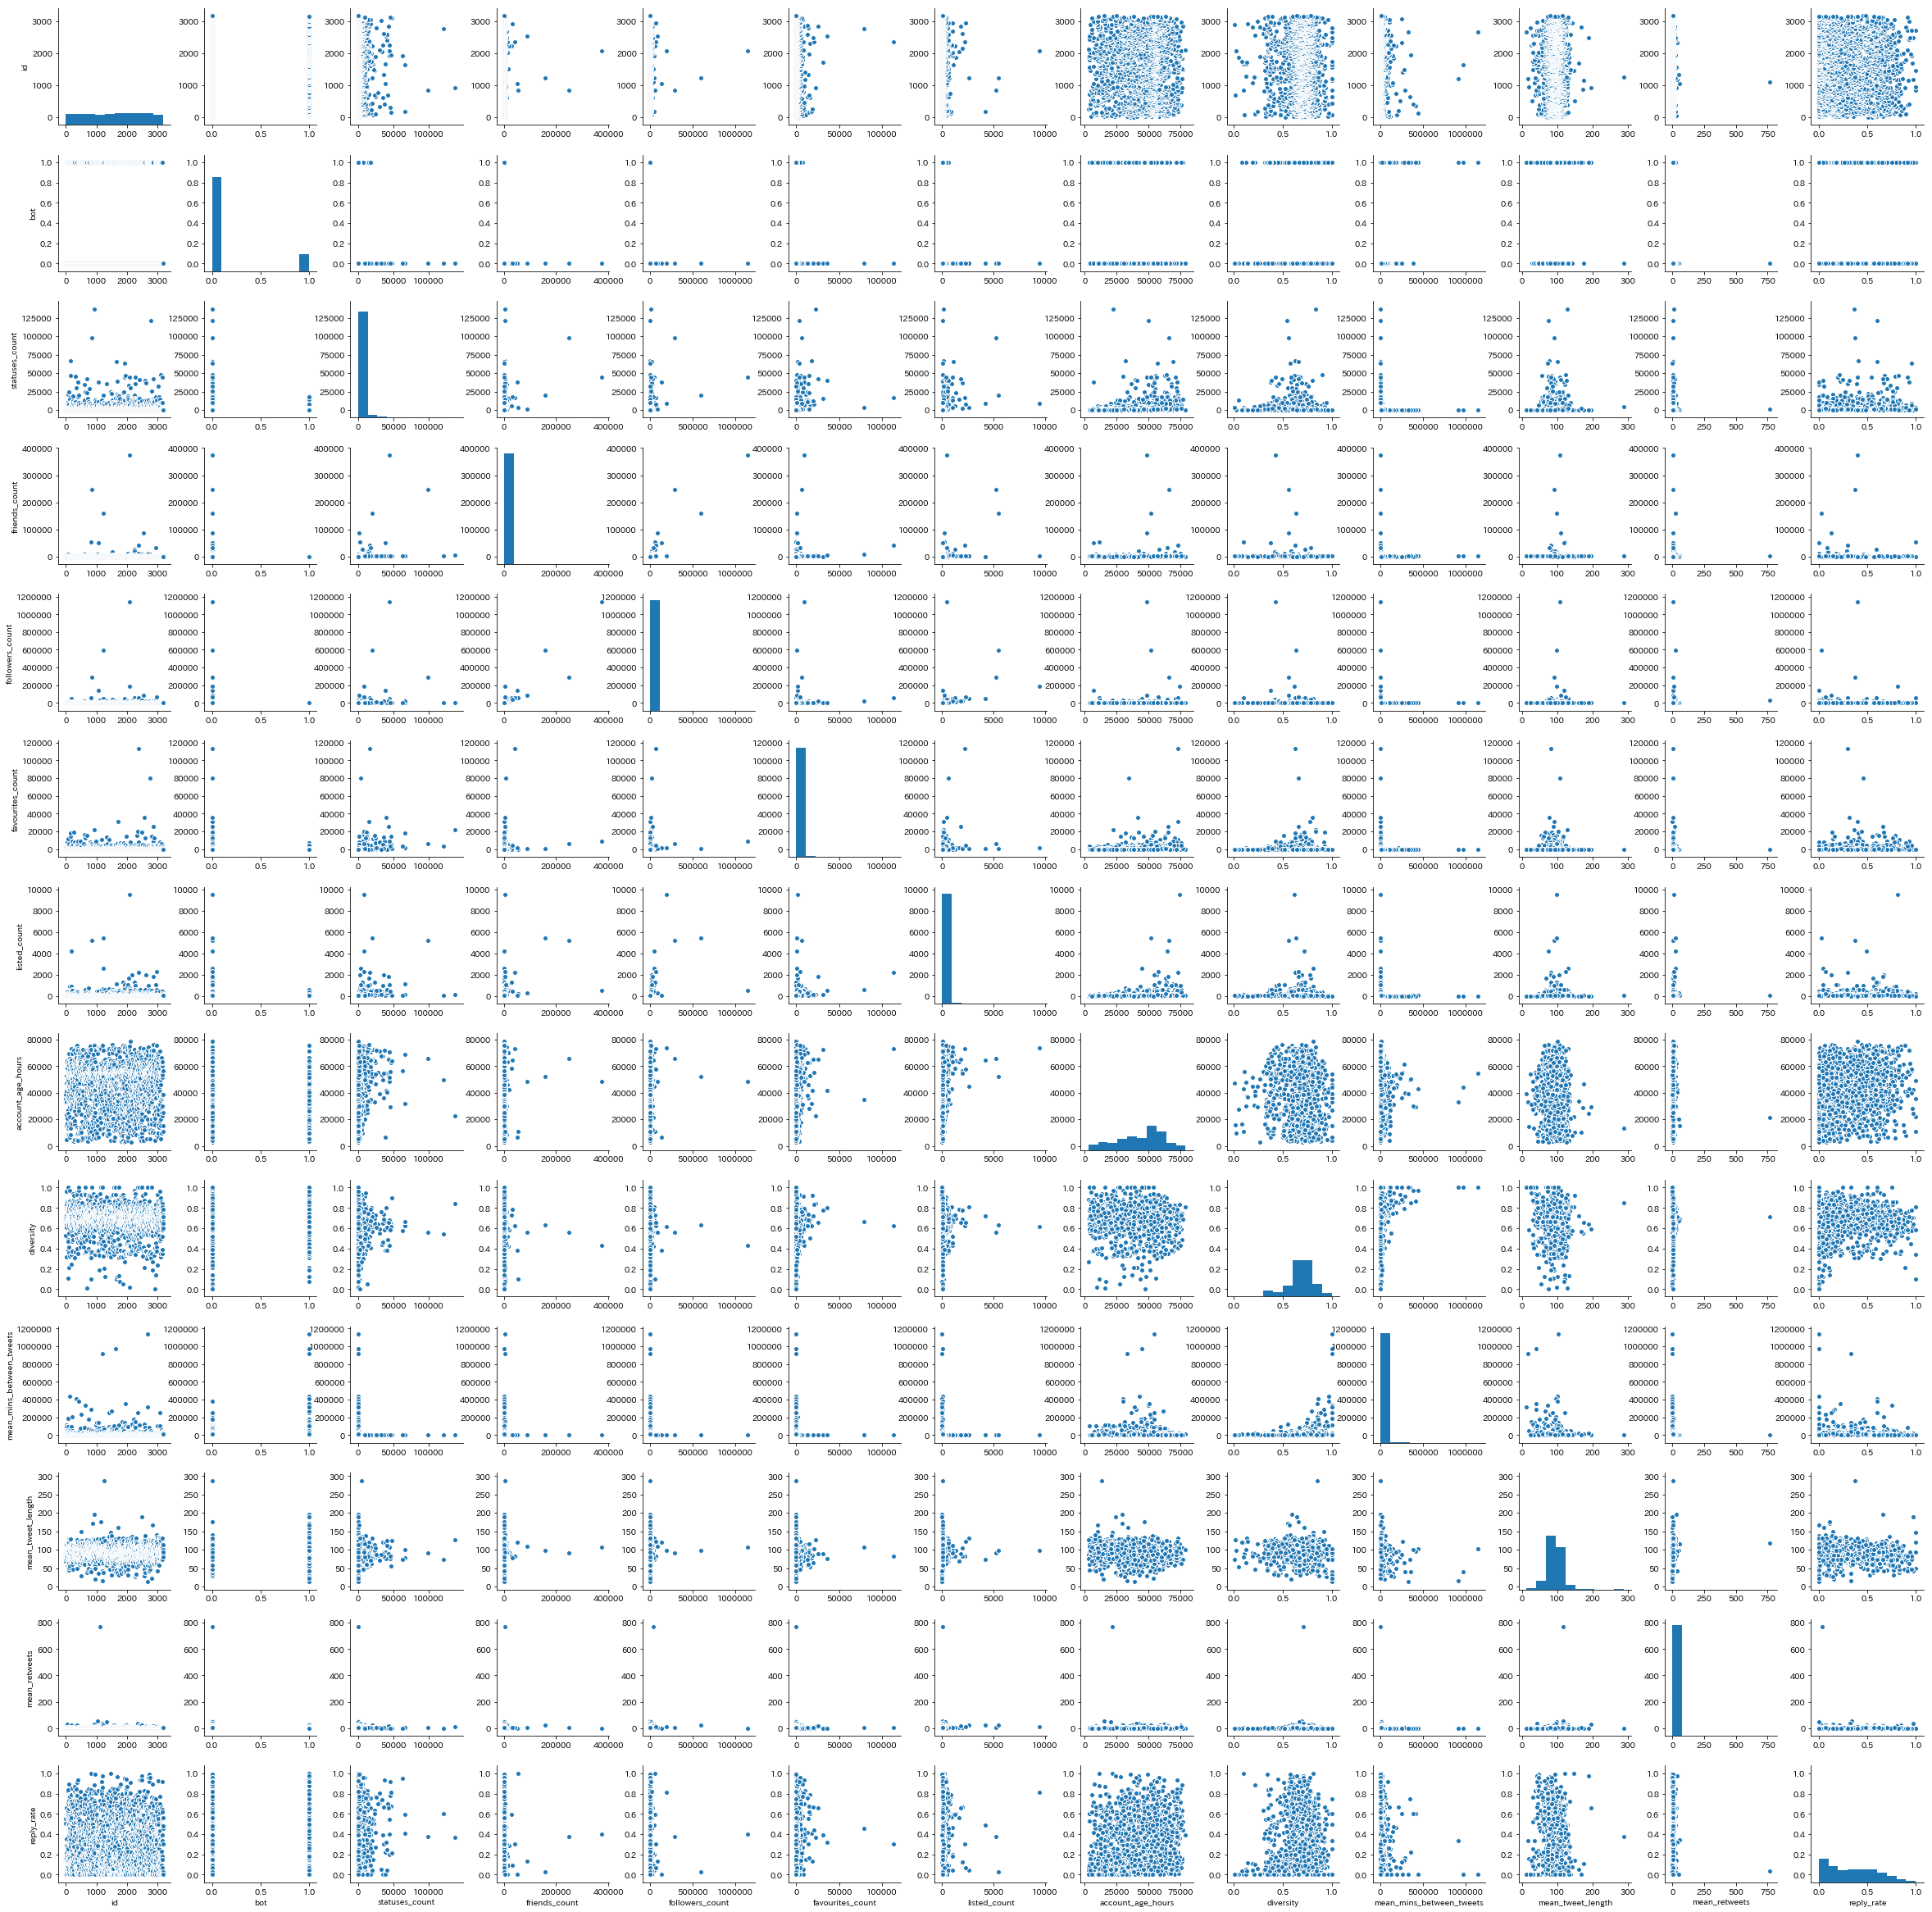

In [16]:
sns.pairplot(df_train1)

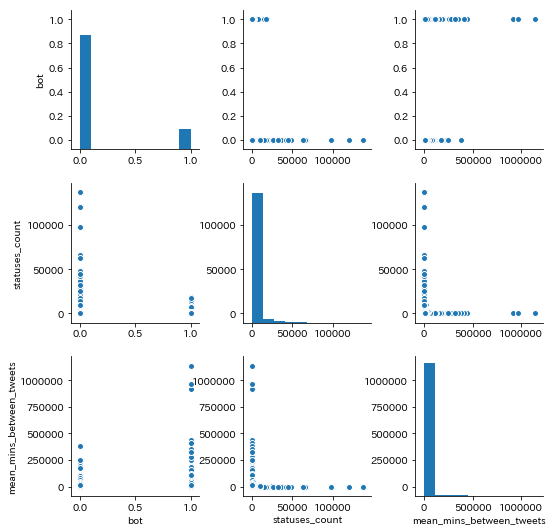

In [17]:
sns.pairplot(df_train[['bot', 'statuses_count','mean_mins_between_tweets']])
# 異常値削除しようかな

In [ ]:
# botと相関がありそうなのはdefault_profile_image,default_profile, mean_mins_between_tweets,geo_enabled,account_age_hours 相関係数0.22以上
# ただし最も相関係数が高いdefault_profile_imageでも0.4程度

In [19]:
trainX = df_train1[['statuses_count','mean_mins_between_tweets']]

In [20]:
trainX.head()

,statuses_count,mean_mins_between_tweets
0,715,3958.863636
1,2151,2746.533708
2,439,11005.031847
3,28,6495.666667
4,40,112167.300000


In [21]:
trainY = df_train1['bot']

In [22]:
# モデルの宣言
model = RandomForestClassifier(n_estimators = 80, random_state=0)

In [23]:
# 学習
model.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
testX = df_test[['statuses_count','mean_mins_between_tweets']]

In [25]:
# 予測
pred = model.predict(testX)

In [26]:
output = pd.read_csv('test.csv', delimiter='\t')

In [27]:
output['bot'] = pred

In [28]:
output[['id', 'bot']].to_csv('submission1.csv', index=False, header=False)

In [ ]:
# 結果は0.45301